<a href="https://colab.research.google.com/github/benassafma/441B-BenAssaf/blob/main/ECON_441B_HW9_Submission_(Mohanad_Ben_Assaf_505631393).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters=3 
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

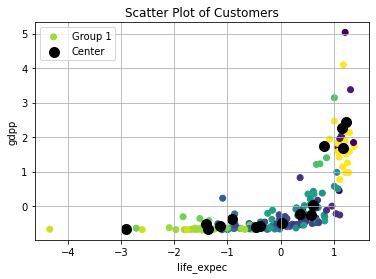

In [45]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 6
x2_index = 8


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [13]:
WCSSs = []
Ks = range(1,30)
for k in Ks:
  kmeans = KMeans(n_clusters=k, init='random',n_init=30, random_state=42)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

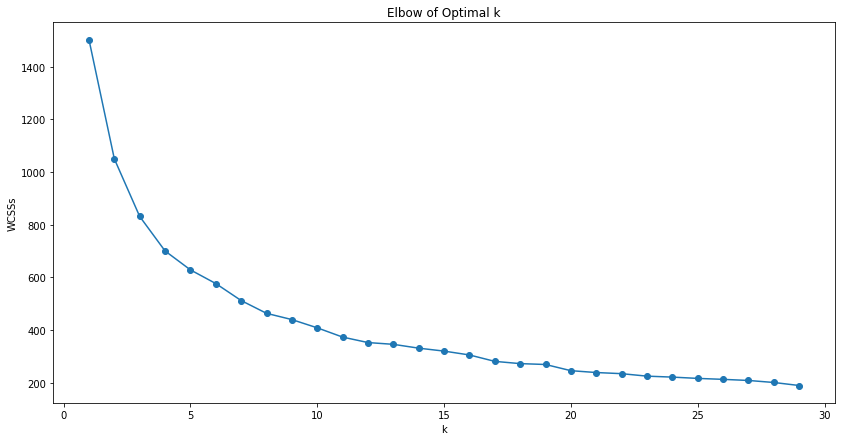

In [14]:
plt.figure(figsize=(14,7))
plt.plot(range(1,30), WCSSs, marker = 'o')
plt.xlabel('k')
plt.ylabel('WCSSs')
plt.title('Elbow of Optimal k')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Looking at the above, it seems that the gain beyond 15 clusters isn't as valuable and maintaining lower number of clusters would add more value for better interpretation of the results.

In [15]:
kmeans = KMeans(n_clusters= 15, init = 'random', n_init= 100, random_state=42).fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [22]:
pred = kmeans.predict(X_scaled)
pred

array([12,  2,  8,  4,  7,  8,  3, 14, 14,  8,  2,  7,  5,  2,  3,  1,  3,
       12,  3,  5,  2, 11,  2, 10,  7, 12, 12,  3, 12, 14,  3, 13, 12,  2,
        8,  2, 12, 12,  4,  2, 12,  2,  7,  7, 14,  2,  2,  5,  2,  4,  5,
        7,  3, 14, 14,  5, 12,  2, 14,  6, 14,  3,  3, 12, 12,  3, 13,  7,
       14,  5,  5,  8,  6,  1, 14, 14,  3, 14,  3,  8,  5, 11, 10,  3,  5,
        7,  2, 11, 11,  8,  7,  0,  2,  5, 12,  7,  7, 12,  0,  4,  7, 11,
        2,  6,  2,  3, 12,  5, 11,  5,  1, 14, 12,  9, 14,  8,  5,  7,  3,
        8,  5,  2, 14, 10,  2,  8, 12,  3,  8, 12,  2,  7, 13,  0,  7,  7,
       11, 11,  7, 14,  8,  3,  6,  3, 14,  1,  6, 12,  7,  6, 12,  3,  3,
        2,  3, 12,  2, 10, 14, 14,  2,  8,  3,  8,  7,  6, 12],
      dtype=int32)

In [26]:
df['cluster'] = pred

In [27]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,12
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,8
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,7
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,8
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,7
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,6


Now that we have added each country in its own cluster, we can list all the countries that are within each cluster.

In [44]:
df2 = pd.DataFrame(list(df.groupby('cluster')['country'].apply(list).values))
df2

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Luxembourg,Malta,Singapore,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Belgium,Ireland,Netherlands,Switzerland,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Albania,Bahamas,Barbados,Bosnia and Herzegovina,Brazil,Chile,Colombia,Costa Rica,Croatia,Dominican Republic,...,Lebanon,"Macedonia, FYR",Moldova,Montenegro,Poland,Romania,Serbia,Turkey,Ukraine,Uruguay
3,Armenia,Belarus,Belize,Bhutan,Cambodia,Cape Verde,Fiji,Grenada,Guatemala,Guyana,...,Morocco,Paraguay,Samoa,St. Vincent and the Grenadines,Suriname,Tonga,Tunisia,Turkmenistan,Vanuatu,None
4,Angola,"Congo, Rep.",Equatorial Guinea,Mauritania,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Bangladesh,Bolivia,Egypt,Eritrea,Gabon,India,Indonesia,Kenya,Lao,Madagascar,...,Philippines,None,None,None,None,None,None,None,None,None
6,Ghana,Iraq,Mongolia,Sudan,Tajikistan,Timor-Leste,Yemen,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Antigua and Barbuda,Bahrain,Bulgaria,Cyprus,Czech Republic,Estonia,Hungary,Latvia,Lithuania,Malaysia,...,Seychelles,Slovak Republic,Slovenia,South Korea,Thailand,Vietnam,None,None,None,None
8,Algeria,Argentina,Azerbaijan,China,Iran,Kazakhstan,Libya,Oman,Peru,Russia,...,Venezuela,None,None,None,None,None,None,None,None,None
9,Nigeria,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Looking at the list of countries in each cluster above, we cannot see exactly why are they grouped in such way, but there some countires in each cluster seem to be geographically close to each other. To dig deeper, we can select a random cluster and explore further. 

In [29]:
df[df['cluster']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,1
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1


looking at the 2nd cluster, we can see that all countries within it are in europe with similar life_expec and child_mort.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [31]:
df.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
1,4.425000,78.850000,10.822500,69.525000,46950.000000,-0.043750,80.825000,1.805000,54500.000000
2,13.943478,31.782609,8.226087,42.682609,13524.347826,4.779000,75.556522,1.800000,8449.130435
3,26.536364,42.336364,5.464091,56.545455,7655.909091,5.014136,70.768182,2.741364,3869.818182
4,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
5,55.342857,23.355643,3.704286,28.054707,5057.857143,9.702857,66.428571,3.331429,1878.571429
6,55.100000,26.057143,6.524286,39.242857,5040.000000,22.085714,67.157143,4.394286,2226.857143
7,9.673684,66.594737,6.466842,66.494737,21457.368421,2.352947,75.931579,1.741579,13309.473684
8,19.742857,37.442857,4.847857,26.721429,19806.428571,17.517857,73.707143,2.322857,8919.285714


# Q7.) Write an observation about the descriptive statistics.

In general, each cluster seem to have a substantial difference in the mean of each feature, which means that the clusterring did its intended job which is creating groups that are as close as possible in the inputted features. An example of that is cluster 2 examined in Q5 where it is clear that the group contain coutries that are very close figures for the features specified.